In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(10, 8)
sns.set()

In [2]:
files = ['fileViews',
         'premium_cancellations',
         'premium_payments',
         'questions',
         'sessions',
         'students',
         'subjects'
         ]

datasets = {}
for file in files:
    datasets[file] = pd.read_csv(f"../data/processed/{file}.csv")#,parse_dates=[1,2],index_col=[0])
    print(f'*********{file}***********')
    print(datasets[file].shape)
    print(datasets[file].head())
    print("____________\n\n")

/home/ahgora/projetos/pd/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


*********fileViews***********
(3028988, 4)
  StudentId                                           FileName  \
0  12970655  Exercicios Resolvidos do Halliday sobre Rotaçã...   
1  12970655  Exercicios Resolvidos do Halliday sobre Rotaçã...   
2  12970655                                          CALCULO I   
3  12970655                                          CALCULO I   
4  12970655                                          CALCULO I   

                     ViewDate Studentclient  
0  2017-02-23 10:46:03.047000       Website  
1  2017-02-23 10:46:12.370000       Website  
2  2017-05-25 22:39:48.000000       Website  
3  2017-05-25 22:40:36.000000       Website  
4  2017-05-25 22:43:16.000000       Website  
____________


*********premium_cancellations***********
(844, 2)
   StudentId            CancellationDate
0   34129668  2016-05-05 19:08:31.937000
1   34129668  2016-05-05 22:48:20.830000
2   82394932  2016-05-20 22:37:21.117000
3   82942835  2016-05-31 13:44:55.307000
4   85382416 

Explorando  FileViews

In [7]:
file_views = datasets['fileViews']
file_views['is_mobile']= [0 if item =='Website' else 1 for item in file_views.Studentclient.values]
file_views['OS_mobile']= [0 if item =='Website' else 1 for item in file_views.Studentclient.values]
file_views.tail()

,StudentId,FileName,ViewDate,Studentclient,is_mobile
3028983,69759595,Gestão de Conhecimento Atividade Diagnóstica 0...,2018-04-26 00:17:17.000000,Android | 6.0.1 | sdk 23,1
3028984,69759595,Gestão do Conhecimento Atividade de Aprendizag...,2018-04-25 22:57:28.000000,Android | 6.0.1 | sdk 23,1
3028985,69759595,Gestão do Conhecimento Atividade de Aprendizag...,2018-04-25 22:57:50.000000,Android | 6.0.1 | sdk 23,1
3028986,69759595,Avaliação de Proficiência Questões de estudo 01,2018-05-13 19:39:21.000000,Android | 6.0.1 | sdk 23,1
3028987,69759595,20180518_183049.jpg,2018-05-20 18:31:31.000000,Android | 6.0.1 | sdk 23,1


In [15]:
df_desktop = file_views.loc[file_views.is_mobile == 0].reset_index()
df_desktop.head()

,index,StudentId,FileName,ViewDate,Studentclient,is_mobile
0,0,12970655,Exercicios Resolvidos do Halliday sobre Rotaçã...,2017-02-23 10:46:03.047000,Website,0
1,1,12970655,Exercicios Resolvidos do Halliday sobre Rotaçã...,2017-02-23 10:46:12.370000,Website,0
2,2,12970655,CALCULO I,2017-05-25 22:39:48.000000,Website,0
3,3,12970655,CALCULO I,2017-05-25 22:40:36.000000,Website,0
4,4,12970655,CALCULO I,2017-05-25 22:43:16.000000,Website,0


In [16]:
df_mobile_version = pd.DataFrame(file_views.loc[file_views.is_mobile == 1].Studentclient.str.split('|', expand=True).values,
                         columns=['OS','version','sdk']
                         )
df_mobile_version.head()
df_mobile_orig = file_views.loc[file_views.is_mobile == 1].reset_index()
df_mobile = pd.concat([df_mobile_orig,df_mobile_version] ,axis=1)
df_mobile.head()

,index,StudentId,FileName,ViewDate,Studentclient,is_mobile,OS,version,sdk
0,32,12970655,Plano de aula - Introdução a lutas,2017-07-10 20:50:42.000000,iOS | 10.2.1,1,iOS,10.2.1,None
1,33,12970655,[Apostila] - Administração de Vendas - Marketi...,2017-07-10 20:50:49.000000,iOS | 10.2.1,1,iOS,10.2.1,None
2,36,12970655,PROVA 2 c/ Gabarito -- CÁLCULO 1 - UFRGS - 201...,2018-04-14 23:34:58.000000,iOS | 11.2.5,1,iOS,11.2.5,None
3,39,12970655,Anotações (Derivadas) Parte 1,2017-09-20 03:20:58.000000,iOS | 10.3.3,1,iOS,10.3.3,None
4,378,24387754,Microeconomia Hal R. Varian,2018-04-13 14:05:30.000000,Android | 7.0 | sdk 24,1,Android,7.0,sdk 24


Comparando uso mobile e desktop

In [19]:
views_desktop, views_mobile = df_desktop.shape[0], df_mobile.shape[0]

((1992260, 6), (1036728, 9))

0.342268770955844

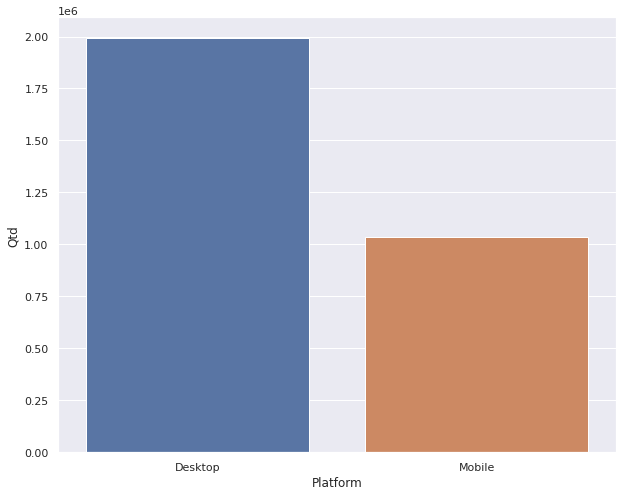

In [42]:
df_data = pd.DataFrame([("Desktop",1992260),("Mobile",1036728)],columns=['Platform',"Qtd"])
df_data.head()
sns.barplot(x='Platform',y='Qtd',data=df_data)
1036728/(1036728+1992260) # 1/3 mobile

<AxesSubplot:>

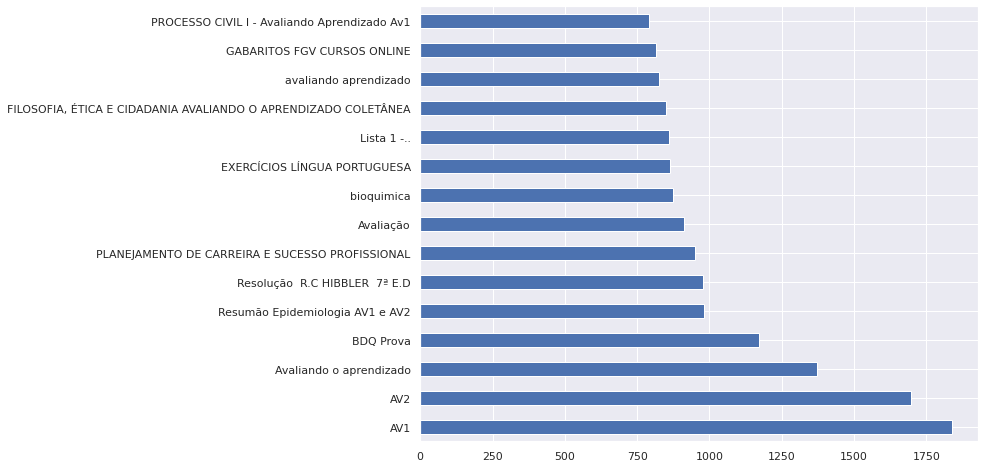

In [80]:
df_desktop.FileName.value_counts().nlargest(15,keep='all').plot.barh()

<AxesSubplot:>

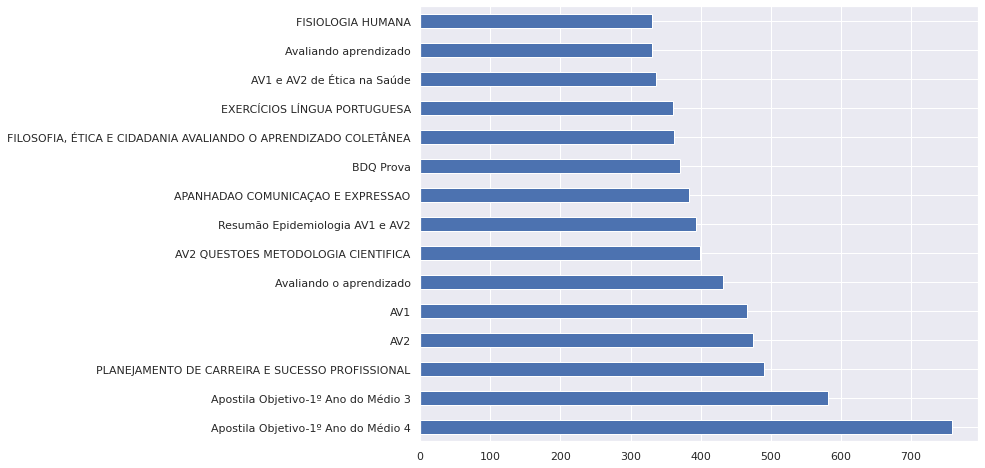

In [79]:
df_mobile.FileName.value_counts().nlargest(15,keep='all').plot.barh()

In [117]:
#top Users mobile
top_mobile = pd.DataFrame(df_mobile.StudentId.value_counts().nlargest(500,keep='all')).reset_index()
top_mobile
top_mobile.columns = ['StudentId','qtd']
top_mobile.head()

,StudentId,qtd
0,12975917,2485
1,56029708,1910
2,62447266,1870
3,383399,1698
4,80323577,1613


In [118]:
#top Users desktop
top_desktop = pd.DataFrame(df_desktop.StudentId.value_counts().nlargest(500,keep='all')).reset_index()

top_desktop.columns = ['StudentId','qtd']
top_desktop.head()

,StudentId,qtd
0,66896685,4775
1,66227543,3692
2,197516,2889
3,9187725,2545
4,13975551,2172


In [ ]:
pd.DataFrame(set(top_mobile.StudentId).intersection(set(top_desktop.StudentId))).count()

In [121]:
pd.DataFrame(set(df_mobile.StudentId).intersection(set(df_desktop.StudentId))).count()

0    17820
dtype: int64

In [139]:
#desktop and mobile
desk_mobile = pd.DataFrame(
    set(df_mobile.StudentId).intersection(set(df_desktop.StudentId))
).count().values[0] /len(file_views.StudentId.unique())
desk_mobile

0.3172399060029908

In [135]:
#only mobile
mobile_only = len(
    set(df_mobile.StudentId) - (set(df_desktop.StudentId))
)  /len(file_views.StudentId.unique())
mobile_only

0.10355693227942747

In [133]:
#only desktop
desktop_only = len(
    set(df_desktop.StudentId) - (set(df_mobile.StudentId))
)  /len(file_views.StudentId.unique())
desktop_only

0.5792031617175817

<AxesSubplot:xlabel='Platform', ylabel='Qtd'>

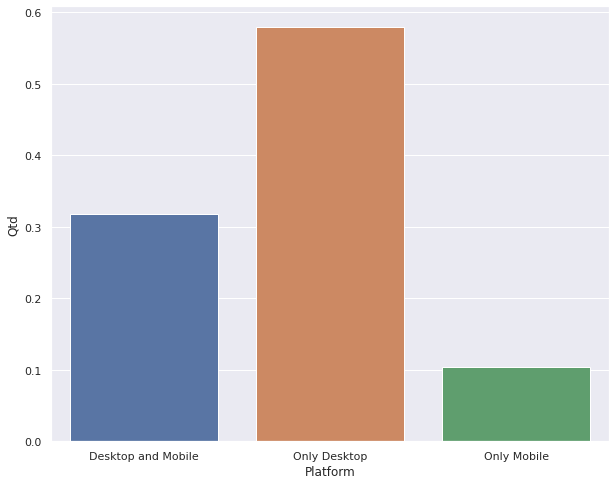

In [140]:
df_data_device = pd.DataFrame([
    ("Desktop and Mobile",desk_mobile),
    ("Only Desktop",desktop_only),
    ("Only Mobile",mobile_only)
],columns=['Platform',"Qtd"])
df_data_device.head()
sns.barplot(x='Platform',y='Qtd',data=df_data_device)

Comparação Android x IOS

 IOS representa = 0.16666152222687367
 Android representa = 0.8333384777731263


,mobile,qtd2
0,Android,863937
1,iOS,172781


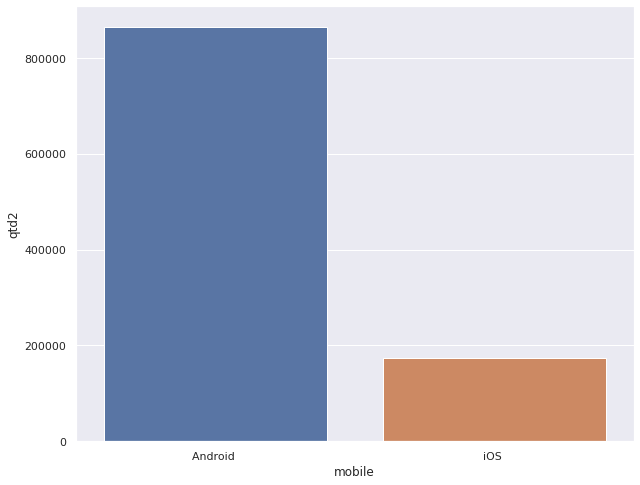

In [56]:
df_total_mobile = df_mobile.OS.value_counts().reset_index()
df_total_mobile.columns = ['mobile', 'qtd2']

sns.barplot(x='mobile',y='qtd2',data=df_total_mobile)
print(f' IOS representa = {172781/(863937+172781)}')
print(f' Android representa = {863937/(863937+172781)}')
df_total_mobile


In [72]:
subjects = datasets['subjects']
subjects.head()

,StudentId,SubjectName,FollowDate
0,12970655,Disciplina Integradora II,2015-09-12 16:00:11.000000
1,12970655,Pesquisa Operacional,2015-09-12 16:00:11.000000
2,12970655,Cálculo I,2016-06-07 17:07:35.000000
3,12970655,Introdução à Administração,2015-09-12 16:00:11.000000
4,12970655,Contabilidade Aplicada à Administração,2015-09-12 16:00:11.000000


<AxesSubplot:>

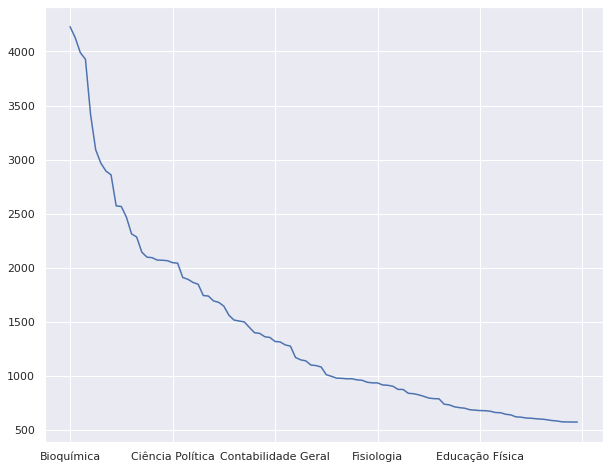

In [75]:
subjects.SubjectName.value_counts().nlargest(100).plot()

<AxesSubplot:>

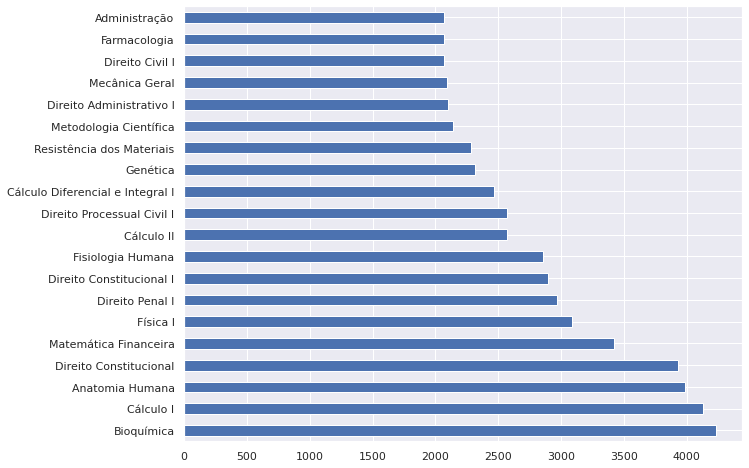

In [82]:
subjects.SubjectName.value_counts().nlargest(20).plot.barh()

## Questão 3:
Considerando o seu conhecimento da plataforma do Passei Direto e os dados
disponibilizados nesse teste, que oportunidades você vê para melhorarmos a experiência dos
nossos usuários? Ofereça insights explorando o como e o porquê.

* onboarding com subjects iniciais (recomendação dos subjects deu suarios da mesma instituição)

* contato entre assinantes pela plataforma
    * dúvidas sobre os materiais

* marcações compartilhadas nos arquivos

* second screen para usuários que usam desktop e mobile

* upload de referências externas ( youtube / wikipedia ...)

* Página da instituição
    * filtros para facilitar a busca no contexto instituição-disciplina

* recomendação de material por similaridade de curso e upvote

* marketplace de professores particulares
    * match de professores e buscas dos estudantes
    * monetizando por leads ( professor quem paga )